In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s6e2/sample_submission.csv
/kaggle/input/playground-series-s6e2/train.csv
/kaggle/input/playground-series-s6e2/test.csv


In [2]:
import pandas as pd 

In [3]:
df=pd.read_csv('/kaggle/input/playground-series-s6e2/train.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

In [6]:
df.isna().sum()

id                         0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [10]:
df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,1
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,0
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,0
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,0
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,1


In [9]:
df['Heart Disease']=df['Heart Disease'].map({'Absence':0,'Presence':1})

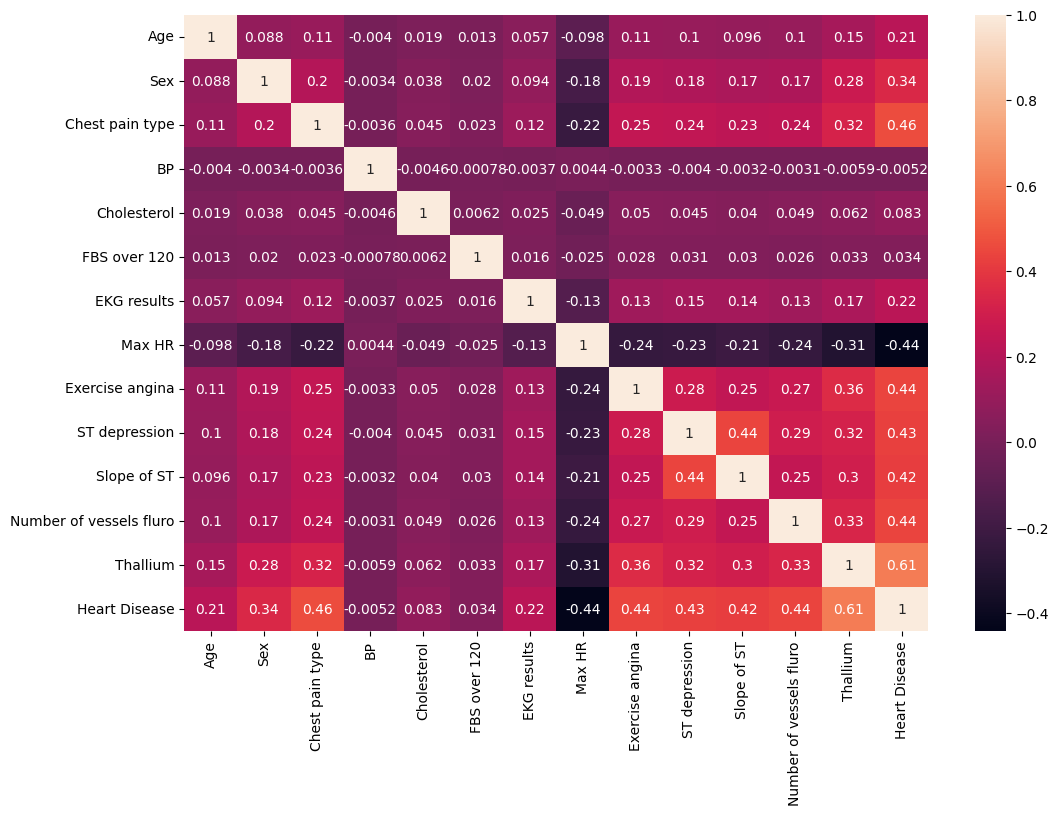

In [28]:
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)
plt.show()



In [12]:
corr=df.corr()
target_corr=corr['Heart Disease'].sort_values(ascending=False)
print(target_corr)

Heart Disease              1.000000
Thallium                   0.605776
Chest pain type            0.460684
Exercise angina            0.441864
Number of vessels fluro    0.438604
ST depression              0.430641
Slope of ST                0.415050
Sex                        0.342446
EKG results                0.218961
Age                        0.212091
Cholesterol                0.082753
FBS over 120               0.033570
id                         0.000209
BP                        -0.005181
Max HR                    -0.440985
Name: Heart Disease, dtype: float64


In [13]:
df=df.drop(columns=['id'])

In [14]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [15]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873,0.448340
std,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007,0.497324
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000,0.000000
75%,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


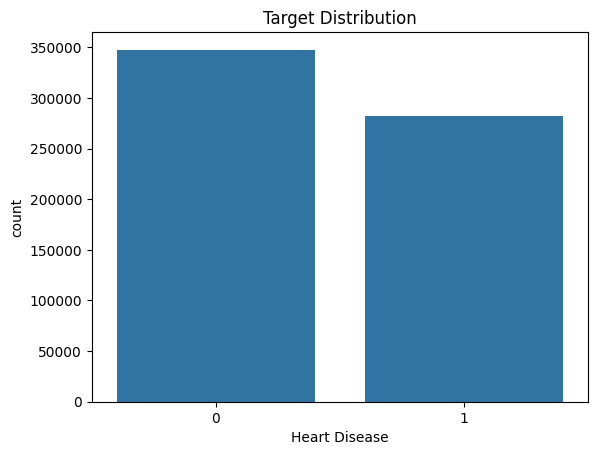

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Heart Disease', data=df)
plt.title("Target Distribution")
plt.show()


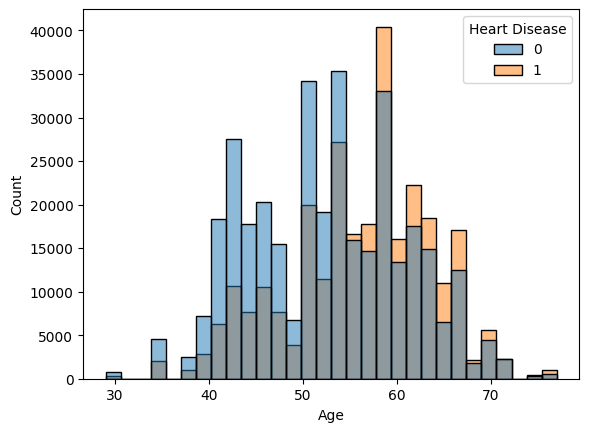

In [29]:
import seaborn as sns
sns.histplot(x='Age',hue='Heart Disease',data=df,bins=30)
plt.show()

In [35]:
df.columns.unique()

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

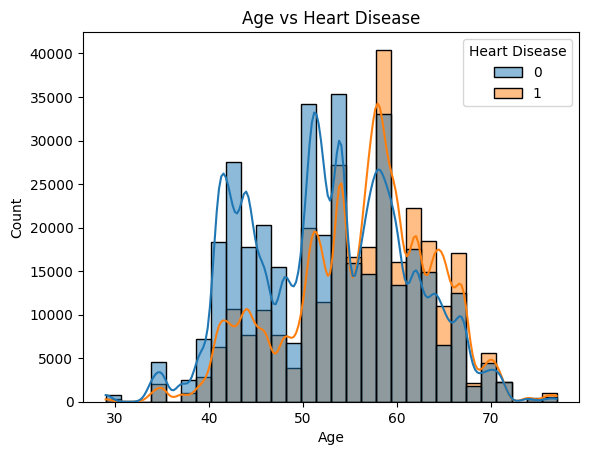

In [17]:
sns.histplot(data=df, x='Age', hue='Heart Disease', bins=30, kde=True)
plt.title("Age vs Heart Disease")
plt.show()


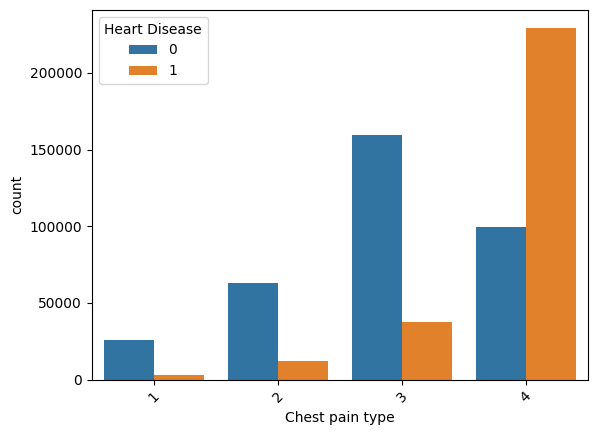

In [18]:
sns.countplot(x='Chest pain type', hue='Heart Disease', data=df)
plt.xticks(rotation=45)
plt.show()


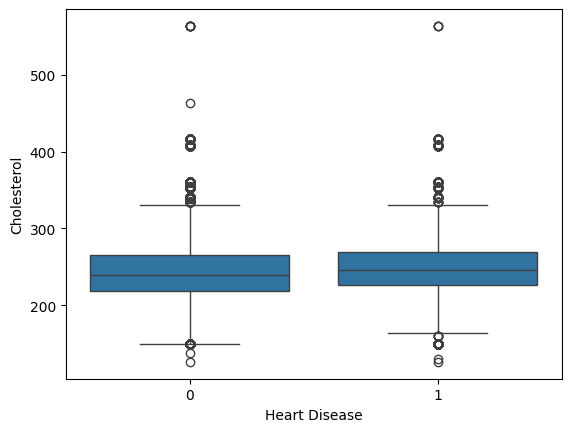

In [19]:
sns.boxplot(x='Heart Disease', y='Cholesterol', data=df)
plt.show()


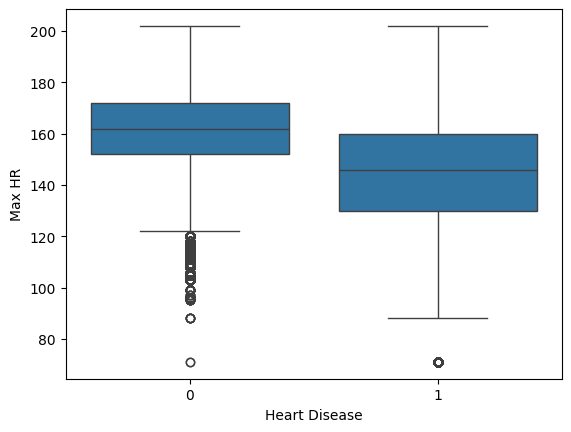

In [20]:
sns.boxplot(x='Heart Disease', y='Max HR', data=df)
plt.show()

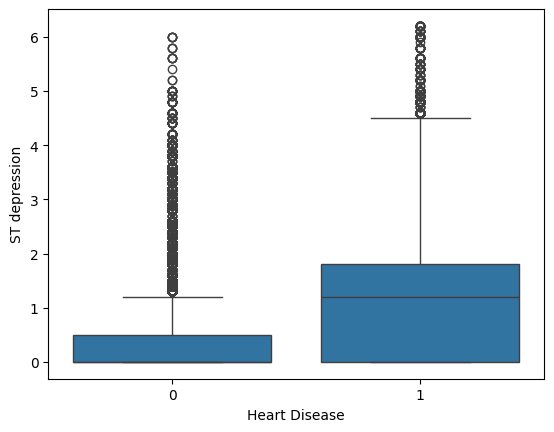

In [21]:
sns.boxplot(x='Heart Disease', y='ST depression', data=df)
plt.show()


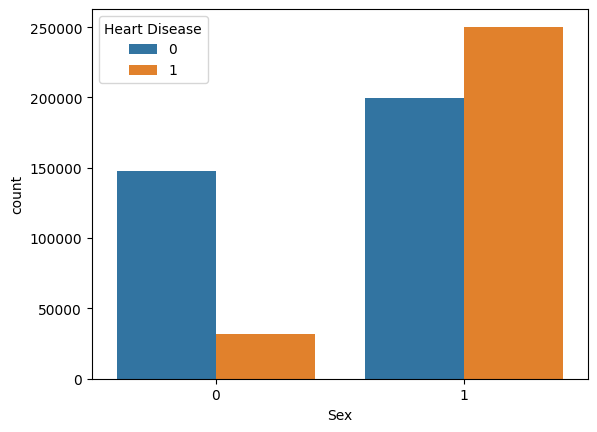

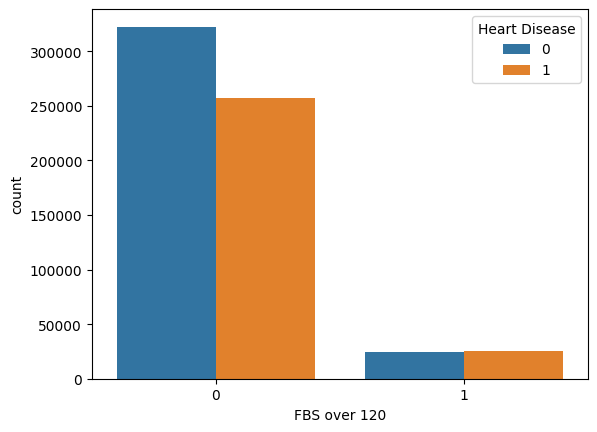

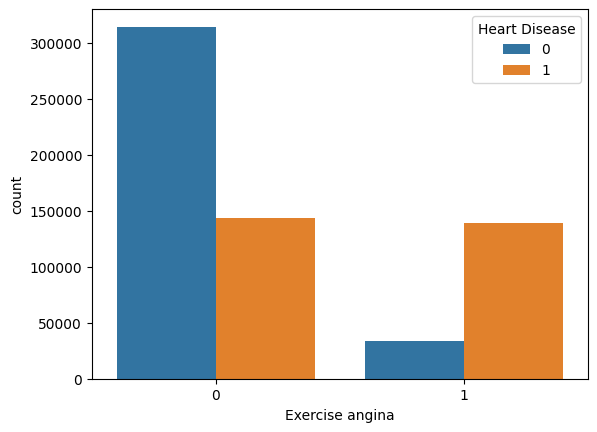

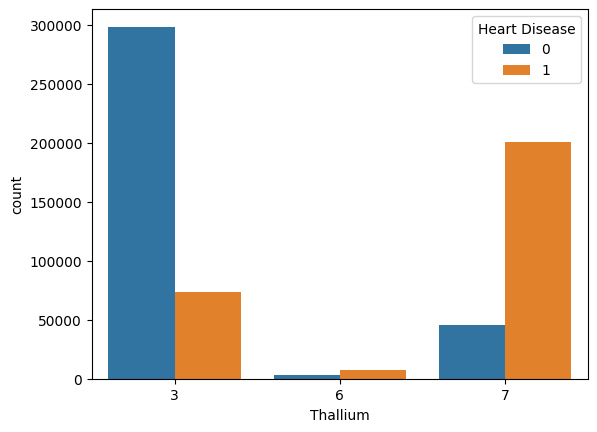

In [23]:
for col in ['Sex', 'FBS over 120', 'Exercise angina', 'Thallium']:
    sns.countplot(x=col, hue='Heart Disease', data=df)
    plt.show()


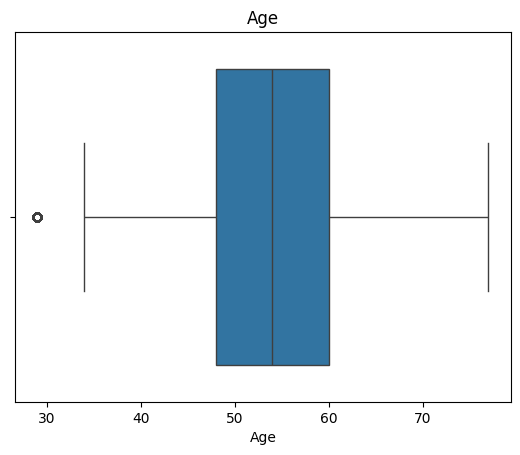

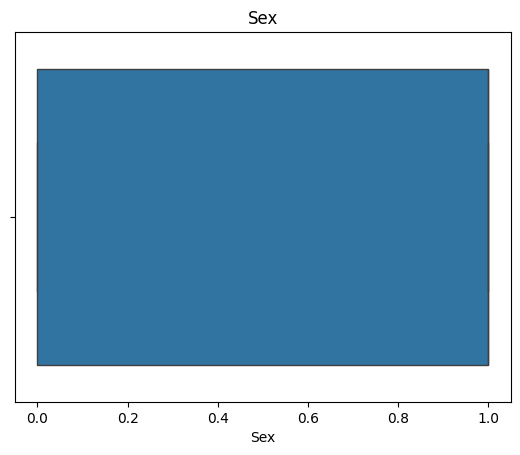

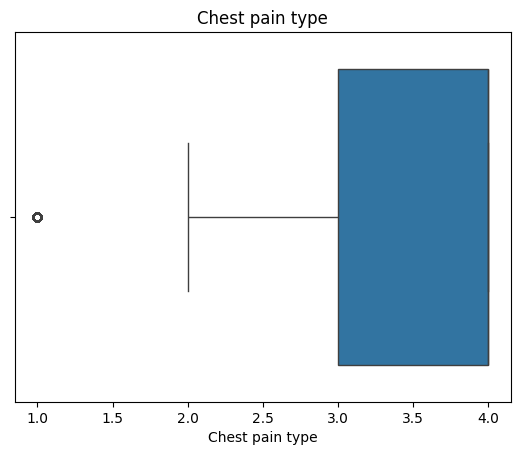

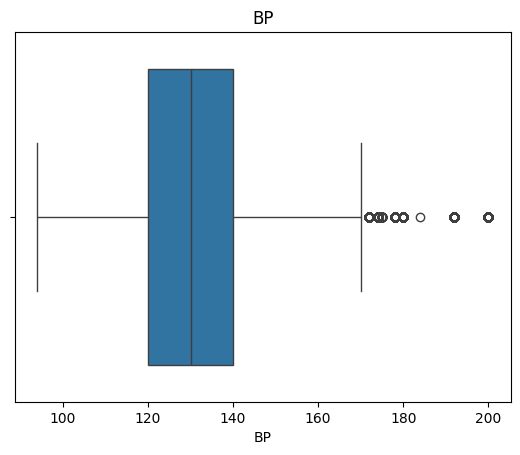

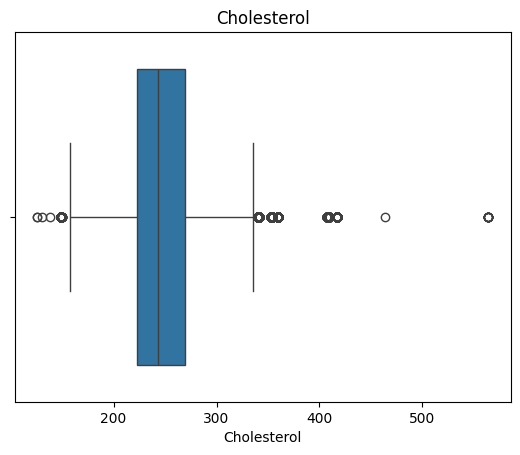

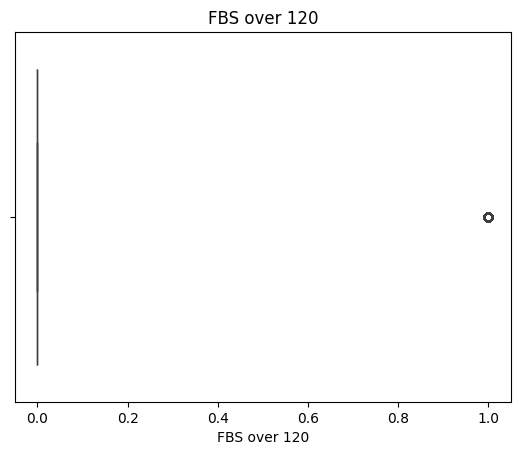

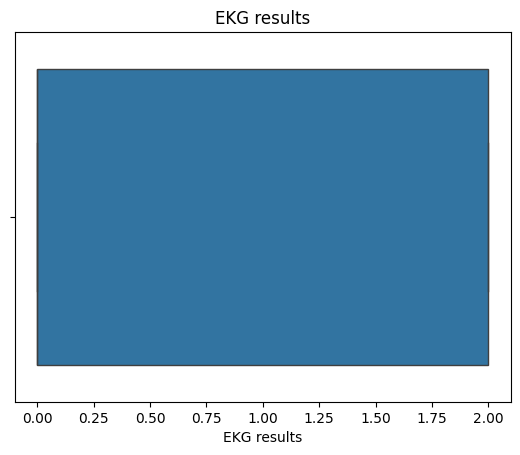

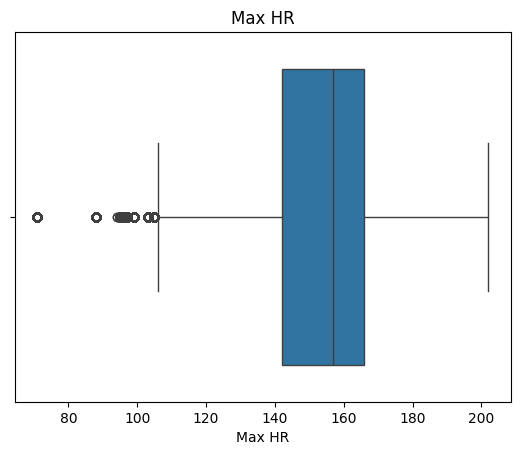

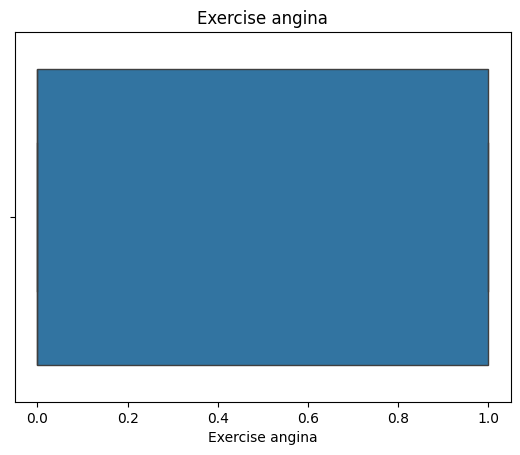

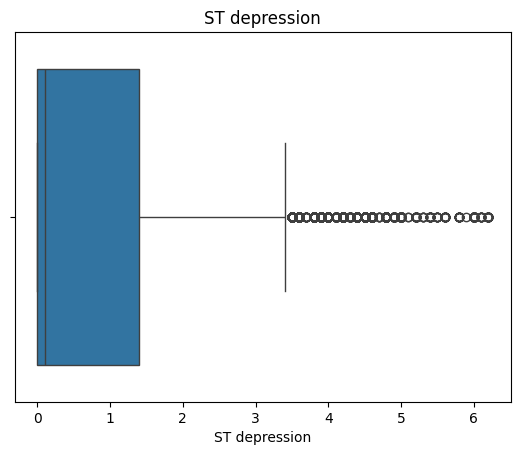

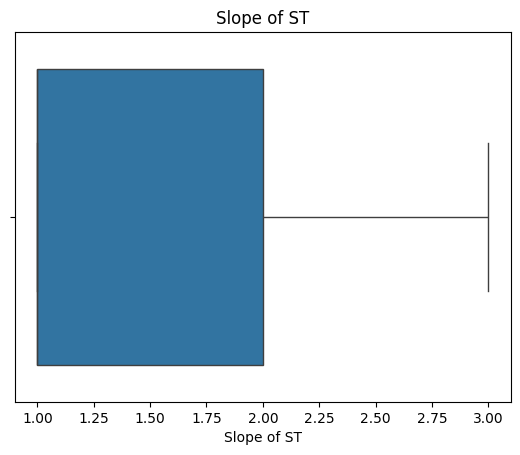

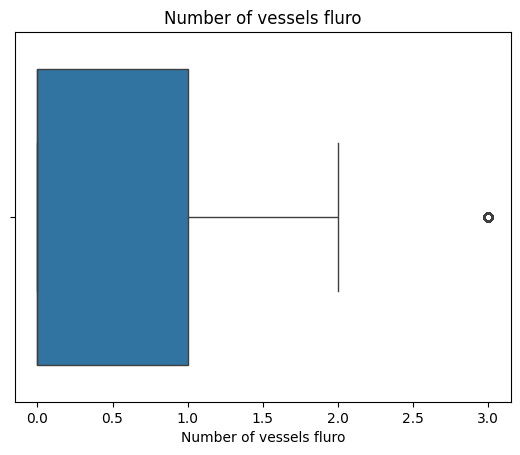

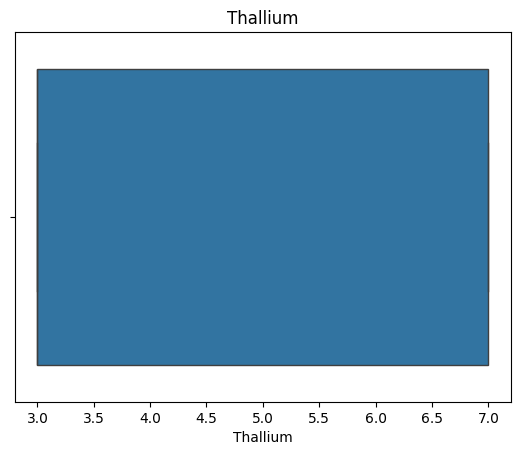

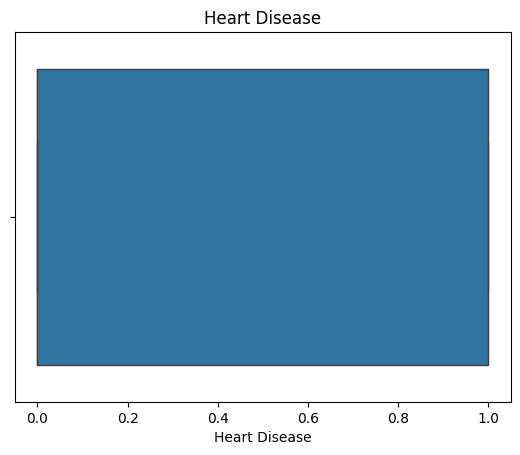

In [24]:
for col in df.select_dtypes(include='number'):
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


In [36]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [44]:
df['Cholesterol'].unique()

array([239, 325, 188, 229, 234, 283, 246, 245, 212, 197, 230, 263, 244,
       231, 274, 282, 199, 226, 204, 185, 177, 250, 211, 303, 201, 266,
       256, 219, 222, 249, 235, 295, 258, 271, 304, 277, 203, 228, 269,
       208, 254, 268, 206, 299, 221, 196, 240, 298, 288, 265, 198, 270,
       243, 309, 233, 330, 255, 315, 261, 294, 223, 214, 273, 286, 267,
       260, 236, 289, 252, 275, 302, 224, 305, 218, 340, 248, 308, 300,
       149, 209, 225, 213, 207, 180, 192, 327, 232, 200, 341, 227, 322,
       220, 311, 210, 172, 247, 360, 306, 318, 215, 335, 205, 178, 182,
       242, 168, 564, 353, 195, 253, 407, 276, 313, 354, 257, 307, 409,
       217, 175, 290, 321, 184, 174, 281, 319, 186, 417, 193, 293, 164,
       166, 160, 216, 183, 326, 237, 158, 259, 262, 170, 464, 150, 264,
       165, 284, 138, 173, 130, 126, 202])

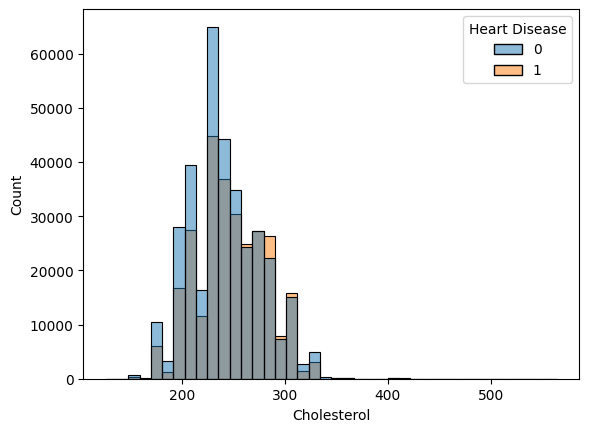

In [49]:
sns.histplot(x='Cholesterol',hue='Heart Disease',data=df,bins=40)
plt.show()

<Axes: xlabel='Max HR'>

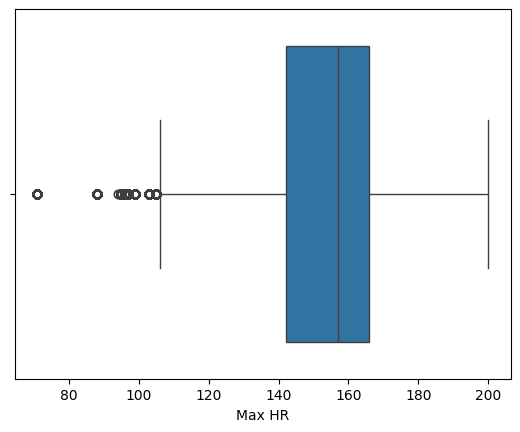

In [52]:
sns.boxplot(x=df['Max HR'])

<Axes: xlabel='ST depression'>

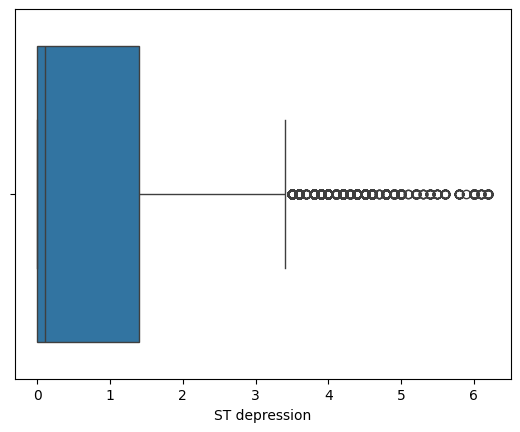

In [53]:
sns.boxplot(x=df['ST depression'])

In [54]:
df['age_group'] = pd.cut(
    df['Age'],
    bins=[0, 40, 55, 70, 100],
    labels=[0, 1, 2, 3]
)


In [55]:
df['chol_level'] = pd.cut(
    df['Cholesterol'],
    bins=[0, 200, 240, 600],
    labels=[0, 1, 2]
)


In [56]:
df['bp_level'] = pd.cut(
    df['BP'],
    bins=[0, 120, 140, 200],
    labels=[0, 1, 2]
)


In [57]:
print(target_corr)

Heart Disease              1.000000
Thallium                   0.605776
Chest pain type            0.460684
Exercise angina            0.441864
Number of vessels fluro    0.438604
ST depression              0.430641
Slope of ST                0.415050
Sex                        0.342446
EKG results                0.218961
Age                        0.212091
Cholesterol                0.082753
FBS over 120               0.033570
id                         0.000209
BP                        -0.005181
Max HR                    -0.440985
Name: Heart Disease, dtype: float64


In [58]:
df['risk_score'] = (
    df['Age'] +
    df['Cholesterol'] +
    df['BP'] +
    df['ST depression']*10
)


In [83]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [61]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, n_estimators=300, random_state=42)

In [62]:
from sklearn.metrics import accuracy_score, roc_auc_score

pred = model.predict(X_valid)
probs = model.predict_proba(X_valid)[:,1]

print("Accuracy:", accuracy_score(y_valid, pred))
print("AUC:", roc_auc_score(y_valid, probs))


Accuracy: 0.8803730158730159
AUC: 0.9492641584763326


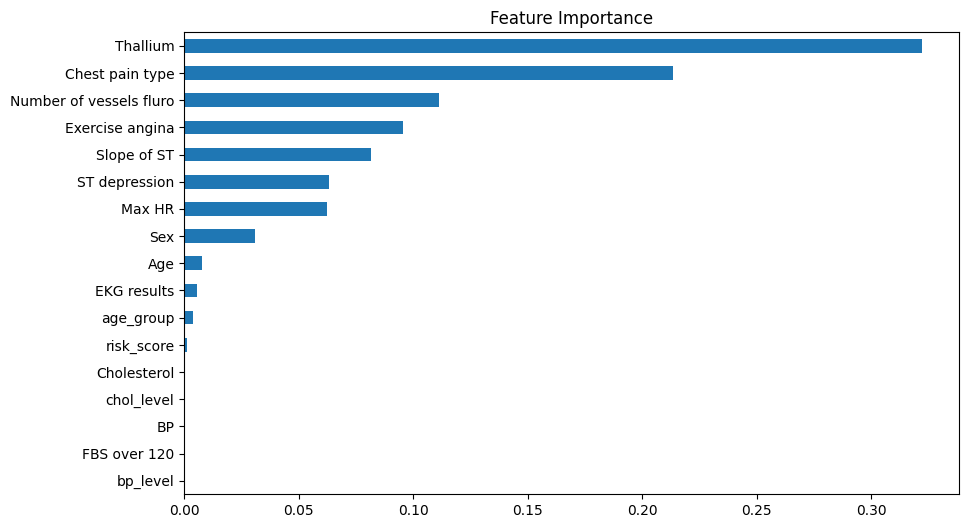

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

imp = pd.Series(model.feature_importances_, index=X.columns)
imp.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.show()


In [69]:
for col in ['age_group', 'chol_level', 'bp_level']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      630000 non-null  int64  
 1   Sex                      630000 non-null  int64  
 2   Chest pain type          630000 non-null  int64  
 3   BP                       630000 non-null  int64  
 4   Cholesterol              630000 non-null  int64  
 5   FBS over 120             630000 non-null  int64  
 6   EKG results              630000 non-null  int64  
 7   Max HR                   630000 non-null  int64  
 8   Exercise angina          630000 non-null  int64  
 9   ST depression            630000 non-null  float64
 10  Slope of ST              630000 non-null  int64  
 11  Number of vessels fluro  630000 non-null  int64  
 12  Thallium                 630000 non-null  int64  
 13  Heart Disease            630000 non-null  int64  
 14  risk

In [81]:
print(X.dtypes[X.dtypes == 'category'])
df=df.drop(columns=['age_group','chol_level','bp_level'])


age_group     category
chol_level    category
bp_level      category
dtype: object


In [85]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=300, max_depth=4)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [86]:
from sklearn.metrics import accuracy_score, roc_auc_score

pred = xgb.predict(X_valid)
probs = xgb.predict_proba(X_valid)[:,1]

print("Accuracy:", accuracy_score(y_valid, pred))
print("AUC:", roc_auc_score(y_valid, probs))


Accuracy: 0.8891904761904762
AUC: 0.9556936438702535


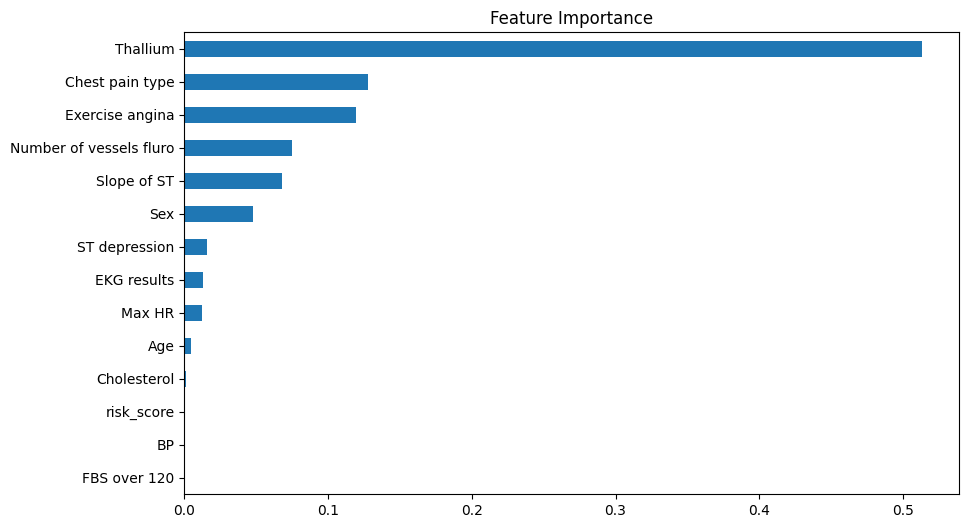

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

imp = pd.Series(xgb.feature_importances_, index=X.columns)
imp.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.show()


In [72]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(n_estimators=300)
lgb.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 225963, number of negative: 278037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448339 -> initscore=-0.207383
[LightGBM] [Info] Start training from score -0.207383


LGBMClassifier(n_estimators=300)

In [73]:
from sklearn.metrics import accuracy_score, roc_auc_score

pred = lgb.predict(X_valid)
probs = lgb.predict_proba(X_valid)[:,1]

print("Accuracy:", accuracy_score(y_valid, pred))
print("AUC:", roc_auc_score(y_valid, probs))


Accuracy: 0.8897936507936508
AUC: 0.9559005248078806


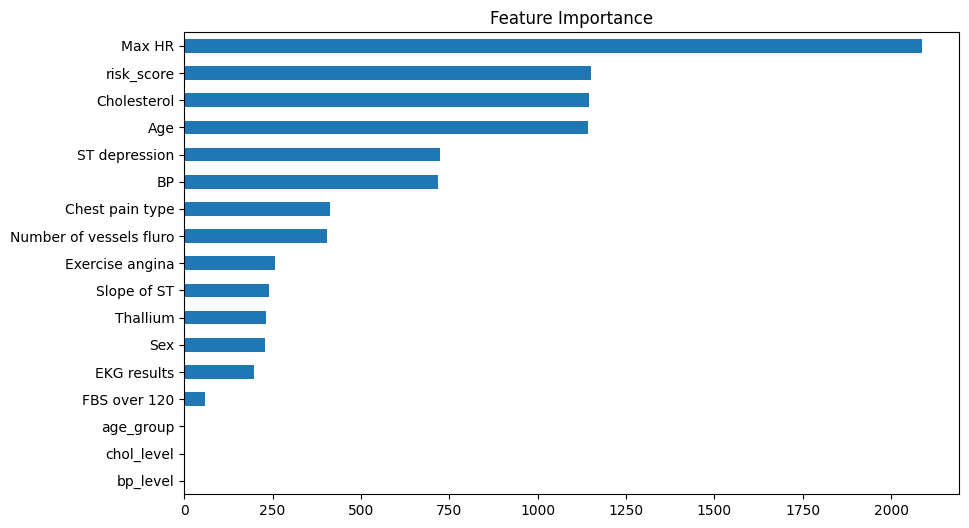

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

imp = pd.Series(lgb.feature_importances_, index=X.columns)
imp.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.show()


In [88]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    use_label_encoder=False
)

param_grid = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5]
}

search = RandomizedSearchCV(
    xgb,
    param_grid,
    n_iter=30,                # increase to 50 for best results
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:16:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:16:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:16:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:16:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:16:58] WARNING: /w

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.03, 0.05,
                                                          0.1],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [200, 300, 400, 500],
                                        'subsample': [0.7, 0.8, 0.9, 1]},
                   scoring='roc_auc', verbose=1)

In [90]:
print("Best Params:")
print(search.best_params_)


Best Params:
{'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.6}


In [91]:
best_xgb = search.best_estimator_


In [92]:
from sklearn.metrics import accuracy_score, roc_auc_score

pred = best_xgb.predict(X_valid)
prob = best_xgb.predict_proba(X_valid)[:,1]

print("Accuracy:", accuracy_score(y_valid, pred))
print("AUC:", roc_auc_score(y_valid, prob))


Accuracy: 0.8902857142857142
AUC: 0.95613924027208


In [103]:
test=pd.read_csv('/kaggle/input/playground-series-s6e2/test.csv')

In [104]:
# create same engineered feature
test['risk_score'] = (
    test['Age'] +
    test['Cholesterol'] +
    test['BP'] +
    test['ST depression']*10
)

# store id
test_ids = test['id']

# drop id
test = test.drop(columns=['id'])

# match columns exactly
test = test[X.columns]

# ensure numeric
test = test.astype(float)


test_pred = best_xgb.predict_proba(test)[:, 1].round(1)

# create submission
submission = pd.DataFrame({
    'id': test_ids,
    'Heart Disease': test_pred
})

submission.to_csv('submission.csv', index=False)
